<H1>Distance-dependent model for inhibitory synaptic connections motifs</H1>
We will test if the number of connectivity motifs found experimentally can be a distance-dependent relation that represent the average connectivity as a function of the intersomatic distance

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# loading python modules
from __future__ import division

import numpy as np

from matplotlib.pyplot import figure
from terminaltables import AsciiTable 

In [3]:
# loading custom writen modules
from inet import DataLoader
from inet.plots import barplot
from simulations import IISigmoidModel # simulation is a local module!

<H2>UPDATE SIGMOID NOTEBOOK BEFORE RUNNING SIMULATION !!!!</H2>
<P>fchem and felect are funcion models that take its parameters directly from a
list. The list is generated by the fitting procedure in the notebook called
**Sigmoid functions to model connections probabilities** and must be updated upon
every new data entry.

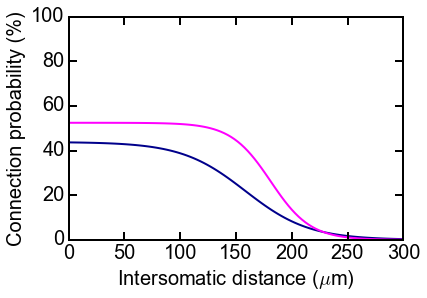

In [4]:
# plot sigmoid model
from simulations import fchem, felec
xval = np.linspace(0,300,100)

plt.plot(xval, fchem(xval), 'darkblue');
plt.plot(xval, felec(xval), 'magenta');
plt.xlabel('Intersomatic distance ($\mu$m)');
plt.ylabel('Connection probability (%)');
plt.ylim(ymax=100);

In [11]:
# use the dataset to create the null hypothesis
mydataset = DataLoader('../data/PV')

 211 syn  files loaded


In [12]:
sigmodel = IISigmoidModel(mydataset)

37 distances matrices loaded
106 distances of chemical synapses
53 distances of electrical synapses


<H2> Simulate synapses with a distance-dependent distribution</H2>

<P>
We simulate the distribution of connection probability as a function of the distance, whose parameters are obtained from the observations. To evaluate that the simulations are correct, we calculate analytically the expected number of chemical and electrical connections in the simulations. The analytical solutions and the simulations must be very close.


In [13]:
#%%timeit #about 11 sec for 1,000 iterations
sigmodel.run(n_iter = 1000, seed=0) # 1,000 random simulations

<H3>Testing null hypothesis</H3>
<P> The null hypothesis is that connections arise from a sigmoid function that 
relates intersomatis distance with connection probability.</P>

In [14]:
# the closer this number gets to the empirical values, the better is the fitting
from simulations import fchem, felec

nchem = np.sum( fchem(sigmodel.chem_dist)/100 )
nelec = np.sum( felec(sigmodel.elec_dist)/100 )

In [15]:
info = [
    ['Type', 'Analytical', 'Simulation', 'Observation'],
    ['ii_chem', nchem, sigmodel.nchem.mean(), mydataset.motif.ii_chem_found ],
    ['ii_elec', nelec, sigmodel.nelec.mean(), mydataset.motif.ii_elec_found ],
]
print(AsciiTable(info).table)

+---------+---------------+------------+-------------+
| Type    | Analytical    | Simulation | Observation |
+---------+---------------+------------+-------------+
| ii_chem | 27.7245648091 | 31.949     | 44          |
| ii_elec | 19.2541080685 | 19.23      | 33          |
+---------+---------------+------------+-------------+



<H3>Calculating P values</H3>
<P> for the null-hypothese</P>

In [16]:
pii_chem = len(sigmodel.nchem[sigmodel.nchem>mydataset.motif.ii_chem_found]) / sigmodel.nchem.size
pii_elec = len(sigmodel.nelec[sigmodel.nelec>mydataset.motif.ii_elec_found])/ sigmodel.nelec.size

pii_bid =    len(sigmodel.nbid[sigmodel.nbid > mydataset.motif.ii_c2_found])/ sigmodel.nbid.size
pii_con =   len(sigmodel.ncon[sigmodel.ncon > mydataset.motif.ii_con_found])/sigmodel.ncon.size # under-rep
pii_div =   len(sigmodel.ndiv[sigmodel.ndiv < mydataset.motif.ii_div_found])/sigmodel.ndiv.size
pii_lin = len(sigmodel.nlin[sigmodel.nlin > mydataset.motif.ii_lin_found])/sigmodel.nlin.size # under-rep

pii_c1e = len(sigmodel.nc1e[sigmodel.nc1e > mydataset.motif.ii_c1e_found])/ sigmodel.nc1e.size
pii_c2e = len(sigmodel.nc2e[sigmodel.nc2e > mydataset.motif.ii_c2e_found])/ sigmodel.nc2e.size

In [ ]:
info = [
    ['Syn Motif', 'Simulation', 'Observation', 'P value'], 
    ['chemical',   sigmodel.nchem.mean(),  mydataset.motif['ii_chem']['found'], pii_chem],
    ['electrical', sigmodel.nelec.mean(),  mydataset.motif['ii_elec']['found'], pii_elec],
    [''],
    ['2 chem',     sigmodel.nbid.mean(), mydataset.motif['ii_c2']['found'] , pii_bid],
    ['convergent', sigmodel.ncon.mean(), mydataset.motif['ii_con']['found'], pii_con],
    ['divergent',  sigmodel.ndiv.mean(), mydataset.motif['ii_div']['found'], pii_div],
    ['chains',     sigmodel.nlin.mean(), mydataset.motif['ii_lin']['found'], pii_lin],
    [''],
    ['1 chem + elec', sigmodel.nc1e.mean(),  mydataset.motif['ii_c1e']['found'], pii_c1e],
    ['2 chem + elec', sigmodel.nc2e.mean(),  mydataset.motif['ii_c2e']['found'], pii_c2e],
     ]
print(AsciiTable(info).table)

<H2> Bar plots for estatistical significance</H2>

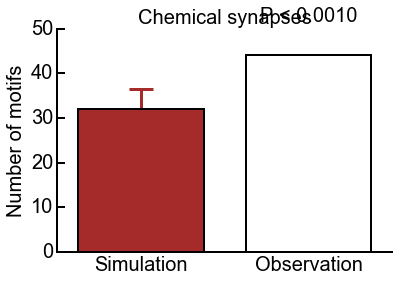

In [19]:
# This is our null hypothesis
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nchem, n_found = mydataset.motif.ii_chem_found, larger=1);
ax.set_title('Chemical synapses', size=20);
ax.set_ylim(ymax=50);
ax.tick_params(labelsize=20)

#fig.savefig('ii_chem_dist.pdf')

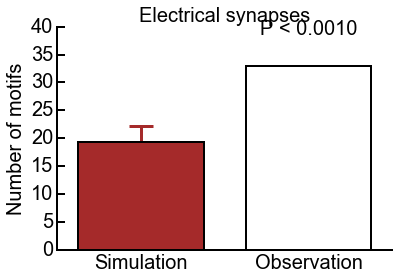

In [20]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nelec, n_found = mydataset.motif.ii_elec_found, larger=1);
ax.set_title('Electrical synapses',  size=20);
ax.set_ylim(ymax=40);
ax.tick_params(labelsize=20)

#fig.savefig('ii_elec_dist.pdf')

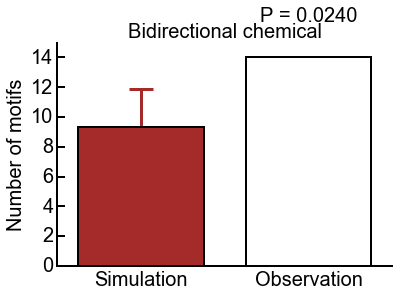

In [21]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nbid, n_found = mydataset.motif.ii_c2_found, larger=1);
ax.set_title('Bidirectional chemical',  size=20);
ax.set_ylim(ymax=15);
ax.tick_params(labelsize=20)

#fig.savefig('ii_c2_dist.pdf')

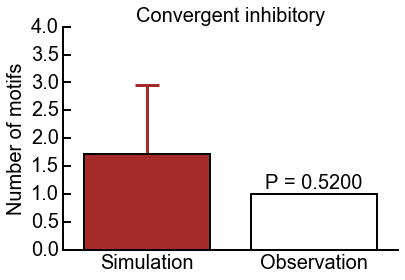

In [22]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.ncon, n_found = mydataset.motif.ii_con_found, larger=1);
ax.set_title('Convergent inhibitory',  size=20);
ax.set_ylim(ymin=0, ymax=4);
ax.tick_params(labelsize=20)

#fig.savefig('ii_con_dist.pdf')

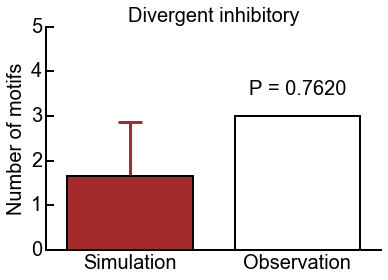

In [23]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.ndiv, n_found = mydataset.motif.ii_div_found, larger=0);
ax.set_title('Divergent inhibitory',  size=20);
ax.set_ylim(ymin=0, ymax=5);
ax.tick_params(labelsize=20)

#fig.savefig('ii_div_dist.pdf')

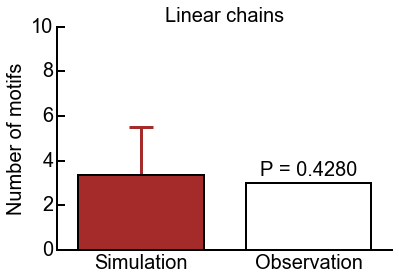

In [24]:
fig = figure()
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nlin, n_found = mydataset.motif.ii_lin_found, larger=1);
ax.set_title('Linear chains',  size=20);
ax.set_ylim(ymin=0, ymax=10);
ax.tick_params(labelsize=20)

fig.savefig('ii_chain_dist.pdf')

#pii_chain # change this value in the plot!

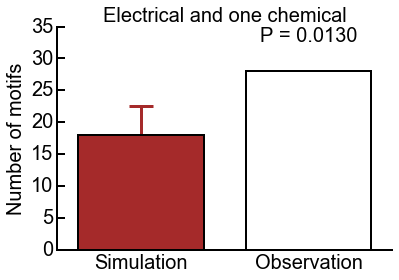

In [26]:
fig = figure() 
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nc1e, n_found = mydataset.motif.ii_c1e_found, larger=1);
ax.set_title('Electrical and one chemical',  size=20);
ax.set_ylim(ymax=35);
ax.tick_params(labelsize=20)

#fig.savefig('ii_c1e_dist.pdf')

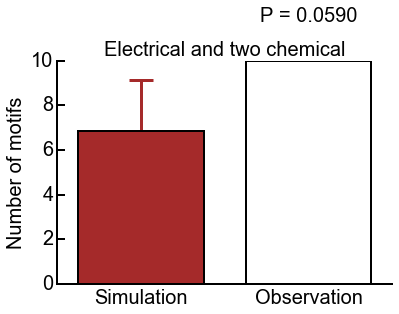

In [27]:
fig = figure(5)
ax = fig.add_subplot(111)

ax = barplot(simulation = sigmodel.nc2e, n_found = mydataset.motif.ii_c2e_found, larger=1);
ax.set_title('Electrical and two chemical',  size=20);
ax.set_ylim(ymin  = 0, ymax=10);
ax.tick_params(labelsize=20)
#fig.savefig('ii_c2d_dist.pdf')